In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# 1. List of all 26 city files
# A city
files = [
    "Bengaluru_data.csv", "Bhopal_data.csv", "Brajrajnagar_data.csv",
    "Chandigarh_data.csv", "Chennai_data.csv", "Coimbatore_data.csv",
    "Delhi_data.csv", "Ernakulam_data.csv", "Gurugram_data.csv", "Guwahati_data.csv",
    "Hyderabad_data.csv", "Jaipur_data.csv", "Jorapokhar_data.csv",
    "Kochi_data.csv", "Kolkata_data.csv", "Lucknow_data.csv",
    "Mumbai_data.csv", "Patna_data.csv", "Shillong_data.csv", "Talcher_data.csv",
    "Thiruvananthapuram_data.csv", "Visakhapatnam_data.csv", "Ahmedabad_data.csv",
    "Aizawl_data.csv", "Amaravati_data.csv", "Amritsar_data.csv"
]

In [3]:
# Task 1: Merge Datasets
print("Merging files...")
df_list = []
for f in files:
    if os.path.exists(f):
        temp_df = pd.read_csv(f)
        df_list.append(temp_df)
    else:
        print(f"Warning: {f} not found.")

merged_df = pd.concat(df_list, ignore_index=True)
merged_df.to_csv("merged_air_quality_data.csv", index=False)
print(f"Merge complete. Total rows: {len(merged_df)}")

Merging files...
Merge complete. Total rows: 29531


In [4]:
# Task 2: Data Cleaning & Feature Engineering
# Convert Date and filter out missing AQI for accurate visualization
merged_df['Date'] = pd.to_datetime(merged_df['Date'], dayfirst=True, errors='coerce')
clean_df = merged_df.dropna(subset=['AQI']).copy()

In [5]:
# Extract Year and Month for temporal analysis
clean_df['Year'] = clean_df['Date'].dt.year
clean_df['Month'] = clean_df['Date'].dt.month

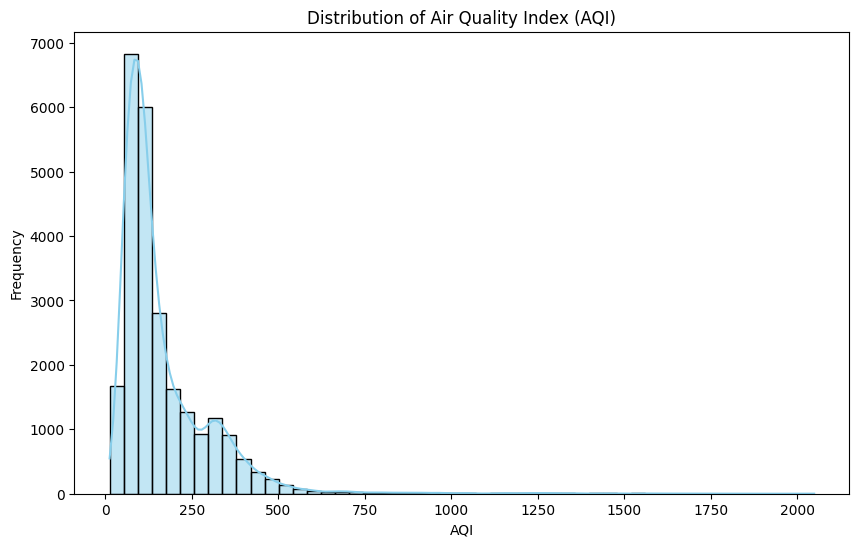

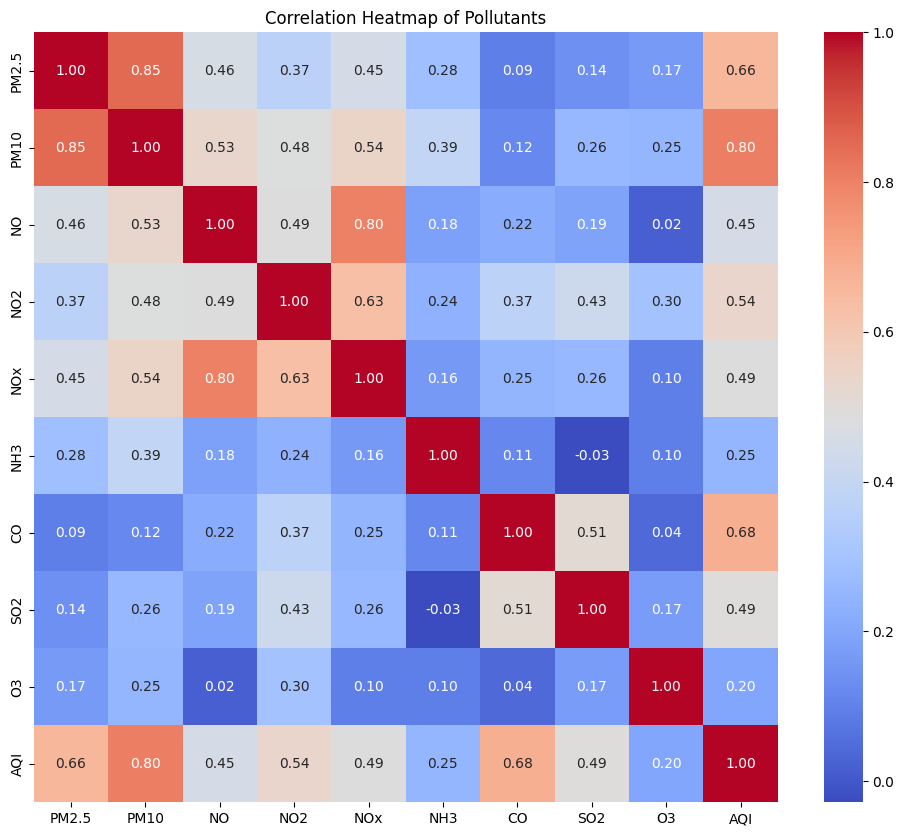

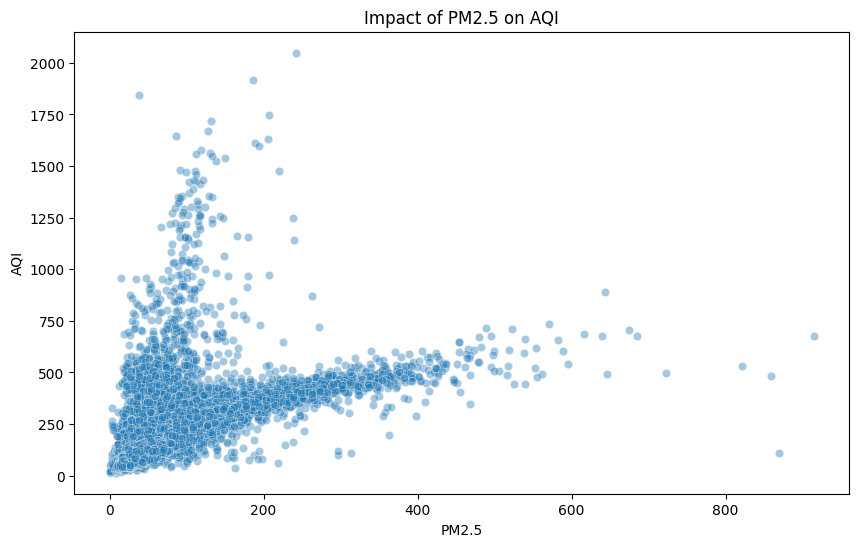

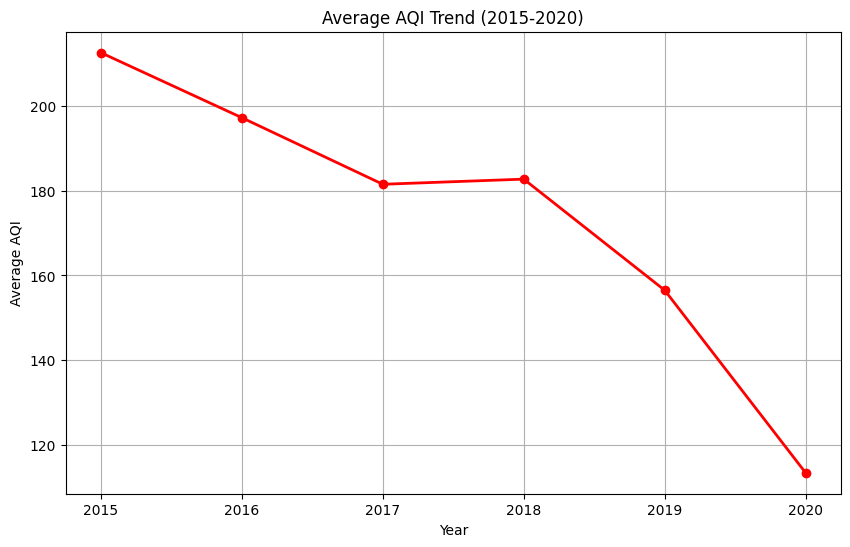

In [6]:
# 1. Univariate: AQI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['AQI'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Air Quality Index (AQI)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

# 2. Multivariate: Correlation Heatmap
plt.figure(figsize=(12, 10))
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI']
sns.heatmap(clean_df[pollutants].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Pollutants')
plt.show()

# 3. Bivariate: PM2.5 vs AQI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='PM2.5', y='AQI', alpha=0.4)
plt.title('Impact of PM2.5 on AQI')
plt.show()

# 4. Temporal Analysis: Yearly Trend
plt.figure(figsize=(10, 6))
clean_df.groupby('Year')['AQI'].mean().plot(kind='line', marker='o', color='red', linewidth=2)
plt.title('Average AQI Trend (2015-2020)')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Selecting features (Pollutants) and Target (AQI)
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
X = clean_df[features]
y = clean_df['AQI']

# 1. Handle Missing Values (Imputation)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 3. Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluate
predictions = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, predictions):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions):.2f}")

R2 Score: 0.88
Mean Absolute Error: 22.50


In [11]:
!pip install streamlit -q
!pip install pyngrok -q
!npm install -g localtunnel -q

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 3s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [12]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Load and clean data (assuming you have merged_air_quality_data.csv)
df = pd.read_csv('merged_air_quality_data.csv')
clean_df = df.dropna(subset=['AQI']).copy()

# Simple Imputation for training
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(clean_df[features])
y = clean_df['AQI']

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# SAVE EVERYTHING TO DISK
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)
clean_df.to_csv('cleaned_data.csv', index=False)
print("Model and Data saved successfully!")

Model and Data saved successfully!


In [13]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import numpy as np

# Load the saved model and data
model = pickle.load(open('model.pkl', 'rb'))
imputer = pickle.load(open('imputer.pkl', 'rb'))
df = pd.read_csv('cleaned_data.csv')

st.set_page_config(page_title="Air Quality Predictor", layout="wide")
page = st.sidebar.selectbox("Navigate", ["Home/EDA", "Predictor"])

if page == "Home/EDA":
    st.title("Air Quality Analysis Dashboard")
    st.dataframe(df.head())
    # Display statistics instead of image to avoid FileNotFoundError
    st.subheader("Dataset Statistics")
    st.write(df.describe())

elif page == "Predictor":
    st.title("AQI Prediction Tool")
    # Inputs for features
    inputs = []
    col1, col2 = st.columns(2)
    features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

    for i, feat in enumerate(features):
        with col1 if i % 2 == 0 else col2:
            val = st.number_input(f"Enter {feat}", value=float(df[feat].median()))
            inputs.append(val)

    if st.button("Predict AQI"):
        prediction = model.predict([inputs])
        st.success(f"Estimated AQI: {prediction[0]:.2f}")

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧your url is: https://rude-suits-fold.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.124.160:8501

